In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from skimage import io

C:\Users\himan\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
df = pd.read_csv('transactions_train.csv', chunksize=100000)
articles = pd.read_csv('articles.csv')


In [3]:
df

In [4]:
articles

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105537,953450001,953450,5pk regular Placement1,302,Socks,Socks & Tights,1010014,Placement print,9,Black,...,Socks Bin,F,Menswear,3,Menswear,26,Men Underwear,1021,Socks and Tights,Socks in a fine-knit cotton blend with a small...
105538,953763001,953763,SPORT Malaga tank,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,2,H&M+,1005,Jersey Fancy,Loose-fitting sports vest top in ribbed fast-d...
105539,956217002,956217,Cartwheel dress,265,Dress,Garment Full body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,18,Womens Trend,1005,Jersey Fancy,"Short, A-line dress in jersey with a round nec..."
105540,957375001,957375,CLAIRE HAIR CLAW,72,Hair clip,Accessories,1010016,Solid,9,Black,...,Small Accessories,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories,Large plastic hair claw.


In [5]:
users = next(df)


In [6]:
users

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2
...,...,...,...,...,...
99995,2018-09-22,398767f185a935edc17cc5db5a346ead3649b08be7b310...,516859002,0.013542,1
99996,2018-09-22,398767f185a935edc17cc5db5a346ead3649b08be7b310...,534357008,0.067780,1
99997,2018-09-22,398767f185a935edc17cc5db5a346ead3649b08be7b310...,487722001,0.042356,1
99998,2018-09-22,398767f185a935edc17cc5db5a346ead3649b08be7b310...,684686001,0.050831,1


In [7]:
df = users.merge(articles, on='article_id')


In [8]:
df

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,663713,Atlanta Push Body Harlow,283,Underwear body,Underwear,...,Expressive Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa..."
1,2018-09-20,3681748607f3287d2c3a65e00bb5fb153de30e9becf158...,663713001,0.049475,2,663713,Atlanta Push Body Harlow,283,Underwear body,Underwear,...,Expressive Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa..."
2,2018-09-20,4ef5967ff17bf474bffebe5b16bd54878e1d4105f7b4ed...,663713001,0.050831,2,663713,Atlanta Push Body Harlow,283,Underwear body,Underwear,...,Expressive Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa..."
3,2018-09-20,6b7b10d2d47516c82a6f97332478dab748070f09693f09...,663713001,0.050831,1,663713,Atlanta Push Body Harlow,283,Underwear body,Underwear,...,Expressive Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa..."
4,2018-09-20,8ac137752bbe914aa4ae6ad007a9a0c5b67a1ab2b2d474...,663713001,0.050831,2,663713,Atlanta Push Body Harlow,283,Underwear body,Underwear,...,Expressive Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018-09-22,38c4fd64a42108a4c821cabe4fd99f87f43981a924cfb6...,661351001,0.067780,2,661351,Karen EMB dress,265,Dress,Garment Full body,...,Projects Dresses,D,Divided,2,Divided,50,Divided Projects,1013,Dresses Ladies,Short dress in an airy weave with a V-neck wit...
99996,2018-09-22,38d1ebd07fec370af9dff972572157516f4d7e49818dcf...,637028001,0.011864,1,637028,CSP Snowflake,252,Sweater,Garment Upper body,...,Tops Fancy Jersey,D,Divided,2,Divided,53,Divided Collection,1005,Jersey Fancy,Top in sweatshirt fabric with a print motif on...
99997,2018-09-22,3915b86df4116d0ddbccfb88d49da8f627431c2120dafa...,623873001,0.005068,2,623873,CC basic shaped,72,Hair clip,Accessories,...,Girls Small Acc/Bags,J,"Children Accessories, Swimwear",4,Baby/Children,43,"Kids Accessories, Swimwear & D",1019,Accessories,Metal hair clips in the shape of butterflies. ...
99998,2018-09-22,3934131f5acca8b4aa2e036df4adf23c752e024e1d2495...,548837002,0.008458,2,548837,Tara bling beanie,75,Hat/beanie,Accessories,...,Knit & Woven,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories,Double-layered hat in a soft rib knit with spa...


In [9]:
df = df[['t_dat', 'customer_id', 'article_id', 'prod_name', 'product_type_name',
       'product_group_name', 
       'graphical_appearance_name', 'colour_group_name',
       'perceived_colour_value_name',
       'perceived_colour_master_name',
       'department_name', 'index_name',
       'index_group_name', 'section_name',
       'garment_group_name', 'detail_desc']]



In [10]:
df

,t_dat,customer_id,article_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,Atlanta Push Body Harlow,Underwear body,Underwear,Solid,Black,Dark,Black,Expressive Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa..."
1,2018-09-20,3681748607f3287d2c3a65e00bb5fb153de30e9becf158...,663713001,Atlanta Push Body Harlow,Underwear body,Underwear,Solid,Black,Dark,Black,Expressive Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa..."
2,2018-09-20,4ef5967ff17bf474bffebe5b16bd54878e1d4105f7b4ed...,663713001,Atlanta Push Body Harlow,Underwear body,Underwear,Solid,Black,Dark,Black,Expressive Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa..."
3,2018-09-20,6b7b10d2d47516c82a6f97332478dab748070f09693f09...,663713001,Atlanta Push Body Harlow,Underwear body,Underwear,Solid,Black,Dark,Black,Expressive Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa..."
4,2018-09-20,8ac137752bbe914aa4ae6ad007a9a0c5b67a1ab2b2d474...,663713001,Atlanta Push Body Harlow,Underwear body,Underwear,Solid,Black,Dark,Black,Expressive Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018-09-22,38c4fd64a42108a4c821cabe4fd99f87f43981a924cfb6...,661351001,Karen EMB dress,Dress,Garment Full body,Embroidery,Light Grey,Dusty Light,Grey,Projects Dresses,Divided,Divided,Divided Projects,Dresses Ladies,Short dress in an airy weave with a V-neck wit...
99996,2018-09-22,38d1ebd07fec370af9dff972572157516f4d7e49818dcf...,637028001,CSP Snowflake,Sweater,Garment Upper body,Colour blocking,Orange,Bright,Orange,Tops Fancy Jersey,Divided,Divided,Divided Collection,Jersey Fancy,Top in sweatshirt fabric with a print motif on...
99997,2018-09-22,3915b86df4116d0ddbccfb88d49da8f627431c2120dafa...,623873001,CC basic shaped,Hair clip,Accessories,Solid,Other Pink,Bright,Pink,Girls Small Acc/Bags,"Children Accessories, Swimwear",Baby/Children,"Kids Accessories, Swimwear & D",Accessories,Metal hair clips in the shape of butterflies. ...
99998,2018-09-22,3934131f5acca8b4aa2e036df4adf23c752e024e1d2495...,548837002,Tara bling beanie,Hat/beanie,Accessories,Application/3D,Light Orange,Dusty Light,Orange,Knit & Woven,Divided,Divided,Divided Accessories,Accessories,Double-layered hat in a soft rib knit with spa...


In [11]:
feature_subset = ['product_group_name', 
       'graphical_appearance_name', 'colour_group_name',
       'perceived_colour_value_name',
       'perceived_colour_master_name',
       'department_name', 'index_name',
       'index_group_name', 'section_name',
       'garment_group_name']


In [12]:
df

,t_dat,customer_id,article_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,Atlanta Push Body Harlow,Underwear body,Underwear,Solid,Black,Dark,Black,Expressive Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa..."
1,2018-09-20,3681748607f3287d2c3a65e00bb5fb153de30e9becf158...,663713001,Atlanta Push Body Harlow,Underwear body,Underwear,Solid,Black,Dark,Black,Expressive Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa..."
2,2018-09-20,4ef5967ff17bf474bffebe5b16bd54878e1d4105f7b4ed...,663713001,Atlanta Push Body Harlow,Underwear body,Underwear,Solid,Black,Dark,Black,Expressive Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa..."
3,2018-09-20,6b7b10d2d47516c82a6f97332478dab748070f09693f09...,663713001,Atlanta Push Body Harlow,Underwear body,Underwear,Solid,Black,Dark,Black,Expressive Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa..."
4,2018-09-20,8ac137752bbe914aa4ae6ad007a9a0c5b67a1ab2b2d474...,663713001,Atlanta Push Body Harlow,Underwear body,Underwear,Solid,Black,Dark,Black,Expressive Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018-09-22,38c4fd64a42108a4c821cabe4fd99f87f43981a924cfb6...,661351001,Karen EMB dress,Dress,Garment Full body,Embroidery,Light Grey,Dusty Light,Grey,Projects Dresses,Divided,Divided,Divided Projects,Dresses Ladies,Short dress in an airy weave with a V-neck wit...
99996,2018-09-22,38d1ebd07fec370af9dff972572157516f4d7e49818dcf...,637028001,CSP Snowflake,Sweater,Garment Upper body,Colour blocking,Orange,Bright,Orange,Tops Fancy Jersey,Divided,Divided,Divided Collection,Jersey Fancy,Top in sweatshirt fabric with a print motif on...
99997,2018-09-22,3915b86df4116d0ddbccfb88d49da8f627431c2120dafa...,623873001,CC basic shaped,Hair clip,Accessories,Solid,Other Pink,Bright,Pink,Girls Small Acc/Bags,"Children Accessories, Swimwear",Baby/Children,"Kids Accessories, Swimwear & D",Accessories,Metal hair clips in the shape of butterflies. ...
99998,2018-09-22,3934131f5acca8b4aa2e036df4adf23c752e024e1d2495...,548837002,Tara bling beanie,Hat/beanie,Accessories,Application/3D,Light Orange,Dusty Light,Orange,Knit & Woven,Divided,Divided,Divided Accessories,Accessories,Double-layered hat in a soft rib knit with spa...


In [13]:
feature_subset

['product_group_name',
 'graphical_appearance_name',
 'colour_group_name',
 'perceived_colour_value_name',
 'perceived_colour_master_name',
 'department_name',
 'index_name',
 'index_group_name',
 'section_name',
 'garment_group_name']

In [14]:
df.isnull().sum()

t_dat                              0
customer_id                        0
article_id                         0
prod_name                          0
product_type_name                  0
product_group_name                 0
graphical_appearance_name          0
colour_group_name                  0
perceived_colour_value_name        0
perceived_colour_master_name       0
department_name                    0
index_name                         0
index_group_name                   0
section_name                       0
garment_group_name                 0
detail_desc                     1125
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   t_dat                         100000 non-null  object
 1   customer_id                   100000 non-null  object
 2   article_id                    100000 non-null  int64 
 3   prod_name                     100000 non-null  object
 4   product_type_name             100000 non-null  object
 5   product_group_name            100000 non-null  object
 6   graphical_appearance_name     100000 non-null  object
 7   colour_group_name             100000 non-null  object
 8   perceived_colour_value_name   100000 non-null  object
 9   perceived_colour_master_name  100000 non-null  object
 10  department_name               100000 non-null  object
 11  index_name                    100000 non-null  object
 12  index_group_name              100000 non-null  object
 13  

In [16]:
df.describe()

,article_id
count,1.000000e+05
mean,5.892020e+08
std,1.028513e+08
min,1.087750e+08
25%,5.590180e+08
50%,6.179190e+08
75%,6.605190e+08
max,7.299310e+08


In [17]:
df.columns

Index(['t_dat', 'customer_id', 'article_id', 'prod_name', 'product_type_name',
       'product_group_name', 'graphical_appearance_name', 'colour_group_name',
       'perceived_colour_value_name', 'perceived_colour_master_name',
       'department_name', 'index_name', 'index_group_name', 'section_name',
       'garment_group_name', 'detail_desc'],
      dtype='object')

In [18]:
df.shape

(100000, 16)

In [19]:
#Choose features to build feature space
features = feature_subset
df1 = df[['customer_id', 'article_id'] + features]


In [20]:
df1

,customer_id,article_id,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name
0,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,Underwear,Solid,Black,Dark,Black,Expressive Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear"
1,3681748607f3287d2c3a65e00bb5fb153de30e9becf158...,663713001,Underwear,Solid,Black,Dark,Black,Expressive Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear"
2,4ef5967ff17bf474bffebe5b16bd54878e1d4105f7b4ed...,663713001,Underwear,Solid,Black,Dark,Black,Expressive Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear"
3,6b7b10d2d47516c82a6f97332478dab748070f09693f09...,663713001,Underwear,Solid,Black,Dark,Black,Expressive Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear"
4,8ac137752bbe914aa4ae6ad007a9a0c5b67a1ab2b2d474...,663713001,Underwear,Solid,Black,Dark,Black,Expressive Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear"
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,38c4fd64a42108a4c821cabe4fd99f87f43981a924cfb6...,661351001,Garment Full body,Embroidery,Light Grey,Dusty Light,Grey,Projects Dresses,Divided,Divided,Divided Projects,Dresses Ladies
99996,38d1ebd07fec370af9dff972572157516f4d7e49818dcf...,637028001,Garment Upper body,Colour blocking,Orange,Bright,Orange,Tops Fancy Jersey,Divided,Divided,Divided Collection,Jersey Fancy
99997,3915b86df4116d0ddbccfb88d49da8f627431c2120dafa...,623873001,Accessories,Solid,Other Pink,Bright,Pink,Girls Small Acc/Bags,"Children Accessories, Swimwear",Baby/Children,"Kids Accessories, Swimwear & D",Accessories
99998,3934131f5acca8b4aa2e036df4adf23c752e024e1d2495...,548837002,Accessories,Application/3D,Light Orange,Dusty Light,Orange,Knit & Woven,Divided,Divided,Divided Accessories,Accessories


In [21]:
dummies_df = pd.get_dummies(df1, columns=features)
dummies_df

,customer_id,article_id,product_group_name_Accessories,product_group_name_Bags,product_group_name_Cosmetic,product_group_name_Garment Full body,product_group_name_Garment Lower body,product_group_name_Garment Upper body,product_group_name_Items,product_group_name_Nightwear,...,garment_group_name_Shorts,garment_group_name_Skirts,garment_group_name_Socks and Tights,garment_group_name_Special Offers,garment_group_name_Swimwear,garment_group_name_Trousers,garment_group_name_Trousers Denim,"garment_group_name_Under-, Nightwear",garment_group_name_Unknown,garment_group_name_Woven/Jersey/Knitted mix Baby
0,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,3681748607f3287d2c3a65e00bb5fb153de30e9becf158...,663713001,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,4ef5967ff17bf474bffebe5b16bd54878e1d4105f7b4ed...,663713001,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,6b7b10d2d47516c82a6f97332478dab748070f09693f09...,663713001,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,8ac137752bbe914aa4ae6ad007a9a0c5b67a1ab2b2d474...,663713001,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,38c4fd64a42108a4c821cabe4fd99f87f43981a924cfb6...,661351001,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
99996,38d1ebd07fec370af9dff972572157516f4d7e49818dcf...,637028001,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
99997,3915b86df4116d0ddbccfb88d49da8f627431c2120dafa...,623873001,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
99998,3934131f5acca8b4aa2e036df4adf23c752e024e1d2495...,548837002,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
minimum_items = 2
groupby_customer = dummies_df.groupby('customer_id')

l = []
cutomer_ids = []
article_ids = []
for key in groupby_customer.groups.keys():
    temp = groupby_customer.get_group(key)
    if temp.article_id.nunique() >= minimum_items:
        l.append(temp.drop('article_id', axis=1).sum(numeric_only=True).values)
        cutomer_ids.append(key)
        article_ids.extend(temp.article_id.values.tolist())

In [23]:
l

[array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [24]:
cutomer_ids

['0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa',
 '000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318',
 '00007d2de826758b65a93dd24ce629ed66842531df6699338c5570910a014cc2',
 '0003abe64294e66a6310c3436fa9e5b754cc5603deef4f26fc8ab8d043af9358',
 '0004068f54dbe1c7054b23c615edc5f733a508ecc54930bf323209f20410898c',
 '0006d37aaf7dd84f9bbc02f6cadcb74fd72ebf370bdc5f110a8a4092aa7e173e',
 '00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4c73235dccbbc132280',
 '0008968c0d451dbc5a9968da03196fe20051965edde7413775c4eb3be9abe9c2',
 '000aa7f0dc06cd7174389e76c9e132a67860c5f65f970699daccc14425ac31a8',
 '000fb6e772c5d0023892065e659963da90b1866035558ec16fca51b0dcfb7e59',
 '00130faf36f2571cf7e08451b317545004a8a85327661ffe0f78d4728047d74f',
 '001521e8394eb81ba43ab5b84ae7e756d51ac813be212a96e8779e0e42c029c0',
 '001597a203568914926b852124d1def6d8bfd56358b25b93e2e71c588615e56e',
 '0016e4c6a51a886903cd20cf5bc56e84f40ccd35b8f45f9e74d251980e9c8bd5',
 '0018a4640de2338492de0fcc8325d6f6

In [25]:
article_ids

[640244003,
 583558001,
 639677008,
 663713001,
 541518023,
 505221004,
 685687003,
 685687004,
 685687001,
 505221001,
 591334019,
 501820008,
 543054005,
 640174004,
 658183002,
 625480003,
 685687004,
 591334004,
 688873012,
 501323011,
 598859003,
 688873020,
 688873011,
 531310002,
 529841001,
 501820043,
 501820043,
 674681001,
 671505001,
 671505001,
 631848002,
 631848002,
 631848002,
 631848002,
 680187001,
 676827002,
 676827002,
 685687002,
 685687002,
 680912006,
 680912006,
 692454002,
 692454002,
 640639001,
 640639001,
 664421002,
 664421002,
 680912009,
 680912009,
 553139001,
 553139001,
 377277001,
 377277001,
 700819006,
 700819006,
 688873001,
 573716039,
 663732001,
 670063001,
 671505002,
 674482003,
 671491001,
 667999001,
 453358001,
 458083003,
 403448007,
 403448007,
 619229004,
 572942002,
 607249001,
 660590001,
 623275011,
 623275011,
 287645023,
 659320001,
 659320001,
 287645003,
 661136002,
 661136002,
 611146011,
 611146011,
 293433018,
 293433018,
 651

In [26]:
user_feature = pd.DataFrame(l, columns = dummies_df.columns[2:])
normalized_user_feature = user_feature.div(user_feature.sum(axis=1), axis=0)
normalized_user_feature.insert(0, 'customer_id', cutomer_ids)
normalized_user_feature = normalized_user_feature.set_index('customer_id')
normalized_user_feature

,product_group_name_Accessories,product_group_name_Bags,product_group_name_Cosmetic,product_group_name_Garment Full body,product_group_name_Garment Lower body,product_group_name_Garment Upper body,product_group_name_Items,product_group_name_Nightwear,product_group_name_Shoes,product_group_name_Socks & Tights,...,garment_group_name_Shorts,garment_group_name_Skirts,garment_group_name_Socks and Tights,garment_group_name_Special Offers,garment_group_name_Swimwear,garment_group_name_Trousers,garment_group_name_Trousers Denim,"garment_group_name_Under-, Nightwear",garment_group_name_Unknown,garment_group_name_Woven/Jersey/Knitted mix Baby
customer_id,,,,,,,,,,,,,,,,,,,,,
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,0.000000,0.0,0.0,0.033333,0.033333,0.033333,0.0,0.0,0.0,0.0,...,0.0,0.033333,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.100000,0.000000,0.0
00007d2de826758b65a93dd24ce629ed66842531df6699338c5570910a014cc2,0.000000,0.0,0.0,0.000000,0.000000,0.100000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.060000,0.0,0.000000,0.0,0.000000,0.000000,0.0
0003abe64294e66a6310c3436fa9e5b754cc5603deef4f26fc8ab8d043af9358,0.000000,0.0,0.0,0.000000,0.000000,0.100000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.025000,0.000000,0.0
0004068f54dbe1c7054b23c615edc5f733a508ecc54930bf323209f20410898c,0.000000,0.0,0.0,0.050000,0.000000,0.050000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fff0ac18093a702a0a06f4cc76582632df3ede9a36556e345150befbeed6885a,0.000000,0.0,0.0,0.000000,0.050000,0.050000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
fff15526121f7d914a54784e68761a1d30b7547e3555738dcceb386eaaa24c4b,0.000000,0.0,0.0,0.000000,0.040000,0.060000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.020000,0.0,0.000000,0.000000,0.0
fff3e75605ec575be9b95eda1e6557299e81bba12668d750c0e973528e48b7ee,0.000000,0.0,0.0,0.000000,0.020000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.020000,0.0,0.000000,0.0,0.080000,0.000000,0.0


In [27]:
item_feature = dummies_df.drop_duplicates(subset='article_id')
item_feature = item_feature[item_feature.article_id.isin(article_ids)].drop('customer_id', axis=1)
item_feature = item_feature.set_index('article_id')
item_feature

,product_group_name_Accessories,product_group_name_Bags,product_group_name_Cosmetic,product_group_name_Garment Full body,product_group_name_Garment Lower body,product_group_name_Garment Upper body,product_group_name_Items,product_group_name_Nightwear,product_group_name_Shoes,product_group_name_Socks & Tights,...,garment_group_name_Shorts,garment_group_name_Skirts,garment_group_name_Socks and Tights,garment_group_name_Special Offers,garment_group_name_Swimwear,garment_group_name_Trousers,garment_group_name_Trousers Denim,"garment_group_name_Under-, Nightwear",garment_group_name_Unknown,garment_group_name_Woven/Jersey/Knitted mix Baby
article_id,,,,,,,,,,,,,,,,,,,,,
663713001,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
541518023,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
505221004,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
685687003,False,False,False,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
685687004,False,False,False,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661351001,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
637028001,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
623873001,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [28]:
scores = normalized_user_feature.dot(item_feature.T)
scores

article_id,663713001,541518023,505221004,685687003,685687004,685687001,505221001,688873012,501323011,598859003,...,327821026,661929001,466381012,714429001,641228003,661351001,637028001,623873001,548837002,538977001
customer_id,,,,,,,,,,,,,,,,,,,,,
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,0.166667,0.1,0.233333,0.166667,0.2,0.2,0.233333,0.2,0.233333,0.166667,...,0.033333,0.233333,0.133333,0.2,0.366667,0.233333,0.233333,0.033333,0.166667,0.1
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,0.8,0.8,0.05,0.15,0.15,0.15,0.0,0.15,0.35,0.25,...,0.0,0.0,0.35,0.1,0.15,0.05,0.0,0.15,0.05,0.05
00007d2de826758b65a93dd24ce629ed66842531df6699338c5570910a014cc2,0.1,0.1,0.52,0.6,0.58,0.58,0.48,0.22,0.16,0.16,...,0.0,0.18,0.04,0.1,0.08,0.1,0.18,0.04,0.08,0.26
0003abe64294e66a6310c3436fa9e5b754cc5603deef4f26fc8ab8d043af9358,0.275,0.125,0.325,0.15,0.3,0.25,0.325,0.15,0.275,0.225,...,0.0,0.325,0.225,0.225,0.3,0.15,0.325,0.075,0.15,0.175
0004068f54dbe1c7054b23c615edc5f733a508ecc54930bf323209f20410898c,0.15,0.2,0.05,0.2,0.2,0.2,0.05,0.3,0.2,0.2,...,0.0,0.1,0.35,0.15,0.25,0.15,0.2,0.15,0.1,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fff0ac18093a702a0a06f4cc76582632df3ede9a36556e345150befbeed6885a,0.45,0.15,0.05,0.35,0.45,0.45,0.05,0.35,0.6,0.4,...,0.1,0.1,0.4,0.05,0.05,0.0,0.1,0.05,0.0,0.05
fff15526121f7d914a54784e68761a1d30b7547e3555738dcceb386eaaa24c4b,0.16,0.06,0.32,0.12,0.18,0.22,0.32,0.1,0.24,0.2,...,0.1,0.38,0.2,0.2,0.22,0.18,0.3,0.04,0.16,0.12
fff3e75605ec575be9b95eda1e6557299e81bba12668d750c0e973528e48b7ee,0.76,0.5,0.0,0.18,0.28,0.28,0.0,0.12,0.4,0.44,...,0.02,0.0,0.34,0.08,0.08,0.0,0.0,0.08,0.0,0.0


In [29]:
def get_rcmnd(customer_id, scores):
    cutomer_scores = scores.loc[customer_id]
    customer_prev_items = groupby_customer.get_group(customer_id)['article_id']
    prev_dropped = cutomer_scores.drop(customer_prev_items.values)
    ordered = prev_dropped.sort_values(ascending=False)   
    return ordered, customer_prev_items

In [30]:
def plot_prev(prev_items):
    fig = plt.figure(figsize=(20, 10))
    for item, i in zip(prev_items, range(1, len(prev_items)+1)):
        item = '0' + str(item)
        sub = item[:3]
        image = path + "/"+ sub + "/"+ item +".jpg"
        image = plt.imread(image)
        fig.add_subplot(1, 6, i)
        plt.imshow(image)

In [31]:
def plot_rcmnd(rcmnds):
    fig = plt.figure(figsize=(20, 10))
    for item, i in zip(rcmnds, range(1, k+1)):
        item = '0' + str(item)
        sub = item[:3]
        image = path + "/"+ sub + "/"+ item +".jpg"
        image = plt.imread(image)
        fig.add_subplot(1, 6, i)
        plt.imshow(image)

In [32]:
from sklearn.decomposition import PCA


In [33]:
pca = PCA(n_components=100)
pca.fit(normalized_user_feature)
pca.explained_variance_ratio_.sum()

0.9582687434697295

In [34]:
user_feature_pca = pd.DataFrame(pca.transform(normalized_user_feature), columns=['component_{}'.format(i) for i in range(1, 101)]).set_index(normalized_user_feature.index)
item_feature_pca = pd.DataFrame(pca.transform(item_feature), columns=['component_{}'.format(i) for i in range(1, 101)]).set_index(item_feature.index)

In [35]:
user_feature_pca

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,...,component_91,component_92,component_93,component_94,component_95,component_96,component_97,component_98,component_99,component_100
customer_id,,,,,,,,,,,,,,,,,,,,,
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,0.063754,-0.036624,-0.028890,0.035716,-0.041044,-0.013119,0.004097,0.010343,0.018544,-0.027803,...,-0.004664,-0.005934,0.001523,0.004286,0.001392,0.014431,-0.001263,-0.007320,0.008436,0.008902
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,-0.020523,0.125758,0.144033,-0.022335,-0.077030,-0.037012,0.019334,-0.018900,-0.025013,-0.002431,...,-0.000470,-0.001782,0.001535,-0.001142,-0.002407,-0.000833,0.000710,-0.001362,0.006709,-0.002113
00007d2de826758b65a93dd24ce629ed66842531df6699338c5570910a014cc2,-0.025038,-0.093697,-0.016267,-0.034802,-0.018559,-0.085859,-0.026326,0.030897,0.001262,0.028048,...,0.003897,-0.000963,-0.003222,0.003021,0.000335,-0.004429,-0.005373,0.004805,0.001532,0.009467
0003abe64294e66a6310c3436fa9e5b754cc5603deef4f26fc8ab8d043af9358,0.073054,-0.015295,-0.060680,-0.050564,-0.041438,-0.029800,-0.020306,-0.020364,-0.038933,-0.060524,...,-0.011010,-0.004246,-0.008276,-0.003534,0.004083,-0.001867,-0.000950,0.005377,0.005554,-0.002083
0004068f54dbe1c7054b23c615edc5f733a508ecc54930bf323209f20410898c,-0.019449,-0.032605,0.033348,-0.027716,0.035317,0.031668,0.049101,0.081257,-0.035003,-0.006259,...,0.010788,0.005109,0.005274,-0.001680,-0.005453,0.000410,0.002834,0.001813,0.009145,-0.000642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fff0ac18093a702a0a06f4cc76582632df3ede9a36556e345150befbeed6885a,-0.089942,0.059660,-0.080630,0.016542,0.033061,-0.017832,0.037875,-0.006511,0.038659,-0.003407,...,0.000062,0.004482,-0.000698,0.001885,0.001444,0.000789,-0.002238,0.000972,0.000191,0.000360
fff15526121f7d914a54784e68761a1d30b7547e3555738dcceb386eaaa24c4b,0.077224,-0.029661,-0.037580,-0.008525,-0.019070,-0.007183,0.030870,0.014695,-0.002230,0.013513,...,-0.003700,0.001131,-0.000873,-0.005094,-0.008662,0.008221,0.006354,-0.008000,-0.000665,-0.001281
fff3e75605ec575be9b95eda1e6557299e81bba12668d750c0e973528e48b7ee,-0.035501,0.120973,0.103030,-0.002442,-0.062628,-0.056598,0.021767,-0.033267,-0.027609,-0.009876,...,0.001133,0.000630,-0.002226,-0.001166,-0.001365,0.000026,-0.000067,0.000485,0.000910,0.000174


In [36]:
item_feature_pca

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,...,component_91,component_92,component_93,component_94,component_95,component_96,component_97,component_98,component_99,component_100
article_id,,,,,,,,,,,,,,,,,,,,,
663713001,-0.668633,2.257463,0.375032,-0.270064,-0.794799,-0.579294,0.302921,-0.691215,-0.258179,-0.204546,...,0.024653,-0.018308,-0.044867,0.012067,-0.026346,-0.003956,0.033266,-0.096141,0.034295,0.018755
541518023,-0.615659,0.812356,1.291346,-0.257344,-1.087649,-0.198193,0.285050,-0.111123,-0.459400,-0.116226,...,-0.010680,-0.082196,0.013351,-0.010361,-0.058819,-0.042336,0.059098,-0.142766,0.135285,-0.002022
505221004,0.542360,-0.823221,-0.732964,-0.586623,-0.724350,-0.743338,-0.296515,0.148380,-0.349331,-0.022329,...,0.083010,-0.108193,-0.182392,0.059529,-0.047467,-0.152891,-0.101697,-0.008439,0.088619,0.319855
685687003,-1.449693,-0.799799,-0.535793,-0.316714,-0.318407,-0.751675,0.036851,0.192359,0.035805,0.285210,...,0.060652,-0.056134,-0.115891,-0.045033,-0.057801,-0.013801,0.059148,-0.118459,0.024621,0.082072
685687004,-1.528451,-0.390158,-0.910668,-0.256049,-0.060925,-0.984180,-0.053794,-0.018319,0.060823,0.111300,...,0.027255,-0.038346,-0.026184,0.044346,-0.019131,-0.018008,0.036153,-0.135779,0.016024,0.008694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661351001,0.732390,-0.362271,-0.340750,0.014239,-0.734008,-0.180109,-0.032329,0.588769,0.681377,0.010323,...,-0.011548,0.155178,0.053346,0.087331,-0.094643,-0.260018,-0.091737,-0.085921,-0.057581,-0.158168
637028001,0.955084,-0.589464,-0.873108,-0.736232,-0.538043,-0.200029,0.743288,0.187373,-0.050698,-0.238397,...,0.292686,0.031861,0.121558,0.040527,0.078899,-0.125895,0.026785,-0.076518,0.111736,-0.000159
623873001,0.140021,0.192790,0.328313,-0.185931,0.240461,0.846701,-0.657061,0.599423,-0.187577,-0.317095,...,0.237752,0.043764,0.071419,-0.036050,-0.069779,0.205387,-0.272683,-0.137749,-0.257835,-0.225461


In [37]:
scores_pca = user_feature_pca.dot(item_feature_pca.T)


In [38]:
scores_pca

article_id,663713001,541518023,505221004,685687003,685687004,685687001,505221001,688873012,501323011,598859003,...,327821026,661929001,466381012,714429001,641228003,661351001,637028001,623873001,548837002,538977001
customer_id,,,,,,,,,,,,,,,,,,,,,
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,-0.103481,-0.066258,0.096574,-0.036854,-0.051739,-0.058957,0.097940,-0.000928,-0.095937,-0.103472,...,-0.045616,0.078250,-0.077320,0.084864,0.233277,0.152658,0.102294,-0.047918,0.095004,-0.013067
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,0.526517,0.628316,-0.090102,-0.056206,-0.104515,-0.111656,-0.137686,-0.054239,0.017639,-0.022982,...,-0.082179,-0.157920,0.136695,-0.016659,0.014330,-0.034851,-0.132967,0.068896,-0.025805,-0.064539
00007d2de826758b65a93dd24ce629ed66842531df6699338c5570910a014cc2,-0.170137,-0.066895,0.338600,0.395358,0.327076,0.321145,0.277344,0.018997,-0.170790,-0.111875,...,-0.079375,0.024383,-0.170757,-0.014254,-0.053228,0.018064,0.049394,-0.041011,0.009192,0.146493
0003abe64294e66a6310c3436fa9e5b754cc5603deef4f26fc8ab8d043af9358,-0.001774,-0.048094,0.183392,-0.060416,0.041059,-0.015745,0.186372,-0.057932,-0.061515,-0.052357,...,-0.087678,0.162745,0.006216,0.103413,0.157033,0.061246,0.187106,-0.010600,0.071743,0.055558
0004068f54dbe1c7054b23c615edc5f733a508ecc54930bf323209f20410898c,-0.118673,0.034275,-0.083949,-0.001871,-0.050246,-0.057509,-0.079082,0.099837,-0.127549,-0.067760,...,-0.078990,-0.053293,0.144562,0.036173,0.118025,0.072315,0.070555,0.076909,0.036235,-0.010190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fff0ac18093a702a0a06f4cc76582632df3ede9a36556e345150befbeed6885a,0.165538,-0.030553,-0.102274,0.132273,0.184047,0.176935,-0.097375,0.134661,0.256619,0.115876,...,0.004455,-0.069699,0.175435,-0.079070,-0.099794,-0.095983,-0.044860,-0.043063,-0.086495,-0.077378
fff15526121f7d914a54784e68761a1d30b7547e3555738dcceb386eaaa24c4b,-0.111280,-0.106361,0.194354,-0.084540,-0.072462,-0.038932,0.197979,-0.101907,-0.091064,-0.071675,...,0.019773,0.224414,-0.011350,0.084564,0.083166,0.098099,0.171210,-0.037213,0.091472,0.006919
fff3e75605ec575be9b95eda1e6557299e81bba12668d750c0e973528e48b7ee,0.485044,0.329054,-0.141648,-0.027965,0.023835,0.016488,-0.139216,-0.085493,0.065946,0.164996,...,-0.064029,-0.159772,0.125053,-0.038969,-0.058634,-0.087146,-0.134168,-0.003565,-0.077701,-0.116502


In [39]:
k = 6
customer_id = scores.index[1]
rcmnds, prev_items = get_rcmnd(customer_id, scores)
rcmnds_pca, prev_items = get_rcmnd(customer_id, scores_pca)
rcmnds = rcmnds.index.values[:k]
rcmnds_pca = rcmnds_pca.index.values[:k]
path = "C:\\Users\\himan\\Downloads\\images (1)\\"

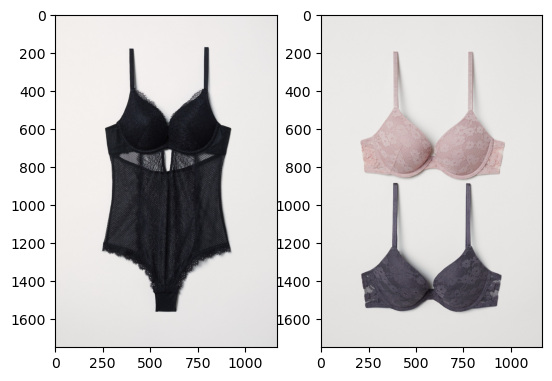

In [40]:
plot_prev(prev_items)


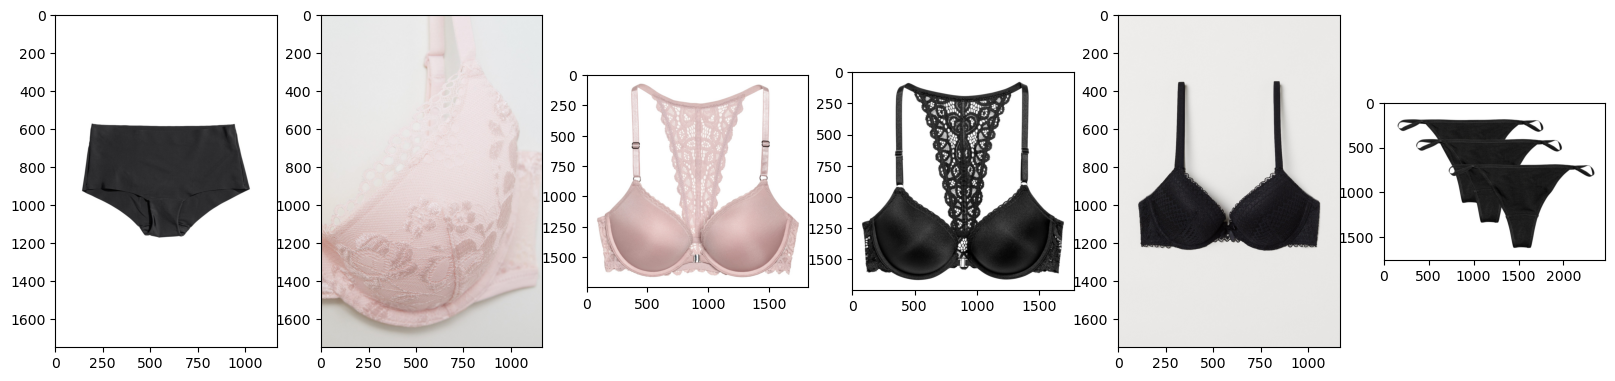

In [41]:
plot_rcmnd(rcmnds)


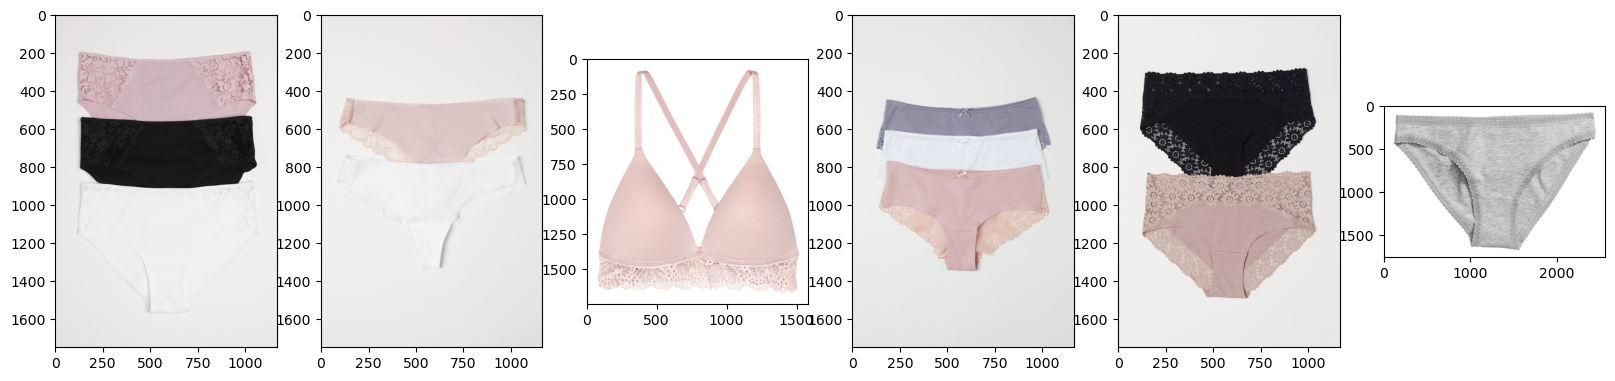

In [42]:
plot_rcmnd(rcmnds_pca)
